In [186]:
import pandas as pd
import numpy as np
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
import matplotlib.pyplot as plt
import pyreadr

In [187]:
path_nodes = r'C:\Users\Dell\Documents\GitHub\opf\data\processed\nodes_33.csv'
path_lines = r'C:\Users\Dell\Documents\GitHub\opf\data\processed\lines_33.csv'
df_nodes = pd.read_csv(path_nodes)
df_lines = pd.read_csv(path_lines)

# Create network

In [188]:
G = nx.Graph()

nodes = list(df_nodes['Nodes'])
edges = list(zip(df_lines['From'],df_lines['To']))
pos = df_nodes.set_index('Nodes')[['pos_x', 'pos_y']].T.apply(tuple).to_dict()
pos= {x: tuple(y.values()) for x, y in pos.items()}

G.add_nodes_from(nodes)
G.add_edges_from(edges)

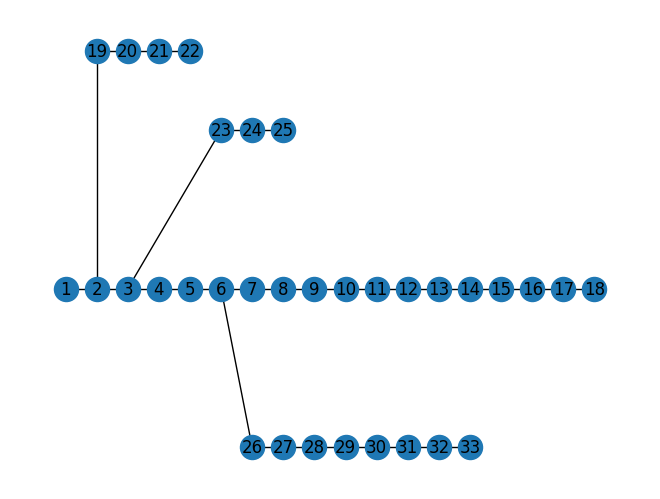

In [189]:
nx.draw(G,pos=pos, with_labels = True)

# Make resources files

In [190]:
columns_list = ['Nodes']
ENERGY_RESOURCE = 'energy_resource'
NUMBER = 5
for i in range(1,NUMBER+1):
    columns_list.append(ENERGY_RESOURCE+str(i))

df_resources = df_nodes[columns_list]

In [191]:
import json
file_names_open = ['cons_nom.json','dg_nom.json','ess_nom.json','ev_nom.json','pv_nom.json']
for file in file_names_open:
    path = "C:\\Users\\Dell\\Documents\\GitHub\\opf\\data\\interim\\"
    with open(file=file) as f:
        print(file[:-5])
        globals()[file[:-5]] = json.load(f)


cons_nom
dg_nom
ess_nom
ev_nom
pv_nom


In [192]:
for index,row in df_resources.iterrows():
    for i in range(len(row)):
        if row[i] == 'cons': 
            
            # extend new values to each list in the dictionary
            for j, (key,value) in enumerate(cons_nom.items()):
                if cons_nom["Nodes"]:
                    if key == "Nodes":
                        cons_nom[key].append(row[0])
                    else:
                        cons_nom[key].append(value[0])
                else:
                    cons_nom["Nodes"].append(row[0])
                    break
        if row[i] == 'dg': 
            
            # extend new values to each list in the dictionary
            for j, (key,value) in enumerate(dg_nom.items()):
                if dg_nom["Nodes"]:
                    if key == "Nodes":
                        dg_nom[key].append(row[0])
                    else:
                        dg_nom[key].append(value[0])
                else:
                    dg_nom["Nodes"].append(row[0])
                    break                
        if row[i] == 'ess': 
            
            # extend new values to each list in the dictionary
            for j, (key,value) in enumerate(ess_nom.items()):
                if ess_nom["Nodes"]:
                    if key == "Nodes":
                        ess_nom[key].append(row[0])
                    else:
                        ess_nom[key].append(value[0])
                else:
                    ess_nom["Nodes"].append(row[0])
                    break
        if row[i] == 'pv': 
            
            # extend new values to each list in the dictionary
            for j, (key,value) in enumerate(pv_nom.items()):
                if pv_nom["Nodes"]:
                    if key == "Nodes":
                        pv_nom[key].append(row[0])
                    else:
                        pv_nom[key].append(value[0])
                else:
                    pv_nom["Nodes"].append(row[0])
                    break
        if row[i] == 'ev': 
            
            # extend new values to each list in the dictionary
            for j, (key,value) in enumerate(ev_nom.items()):
                if ev_nom["Nodes"]:
                    if key == "Nodes":
                        ev_nom[key].append(row[0])
                    else:
                        ev_nom[key].append(value[0])
                else:
                    ev_nom["Nodes"].append(row[0])
                    break  

In [193]:
for file in file_names_open:
    print('df_'+file[:-9])
    globals()['df_'+file[:-9]] = pd.DataFrame(globals()[file[:-5]])

df_cons
df_dg
df_ess
df_ev
df_pv


# Make time series data

In [194]:
HOURS = 24
DAYS = 1
TIMESTEPS = HOURS*DAYS

In [195]:
mean_active = np.load(r'C:\Users\Dell\Documents\GitHub\opf\data\interim\cons_act_mean.npy')
mean_reactive = np.load(r'C:\Users\Dell\Documents\GitHub\opf\data\interim\cons_react_mean.npy')

In [196]:
mean_active = np.repeat(mean_active[:, np.newaxis], DAYS, axis=1).flatten()
mean_reactive = np.repeat(mean_reactive[:, np.newaxis], DAYS, axis=1).flatten()

In [197]:
num_of_cons = len(cons_nom["Nodes"])

dict_data = {}
for i in range(num_of_cons):

    column_act = 'PD'+'_'+str(i+1)+'_'+str(cons_nom["Nodes"][i])
    column_react = 'QD'+'_'+str(i+1)+'_'+str(cons_nom["Nodes"][i])
    dict_data[column_act] = mean_active
    dict_data[column_react] = mean_reactive



In [198]:
mean_pv = np.load(r'C:\Users\Dell\Documents\GitHub\opf\data\interim\pv_mean.npy')
mean_pv = mean_pv[:TIMESTEPS]


In [199]:
num_of_pv = len(pv_nom["Nodes"])

dict_data = {}
for i in range(num_of_pv):

    column_pv = 'PV'+'_'+str(i+1)+'_'+str(pv_nom["Nodes"][i])
    dict_data[column_pv] = mean_pv


In [200]:
Delta_t = np.ones((TIMESTEPS,))
dict_data['Delta_t'] = Delta_t

In [201]:
len(mean_pv)

24

In [202]:
result = pyreadr.read_r(path=r'C:\Users\Dell\Documents\GitHub\opf\data\raw\Exercise3.RData')
input_df = result['AllDat']
U = np.array([input_df['Ta'].to_numpy(),input_df['Gv'].to_numpy(),input_df['Ph1'].to_numpy()])

In [203]:
Ti = input_df['Ta'].to_numpy()[:TIMESTEPS]
Gv = input_df['Gv'].to_numpy()[:TIMESTEPS]
Ph = input_df['Ph1'].to_numpy()[:TIMESTEPS]

In [204]:
len(Ti)

24

In [205]:
dict_data['Ti'] = Ti
dict_data['Gv'] = Gv
dict_data['Ph'] = Ph

In [206]:
pt = np.array([0.06243,
0.06015,
0.05723,
0.05266,
0.05497,
0.06119,
0.06153,
0.06481,
0.06973,
0.0802,
0.08381,
0.08643,
0.08449,
0.08613,
0.08778,
0.08943,
0.08716,
0.08717,
0.09862,
0.1,
0.09636,
0.08886,
0.08037,
0.07058
])
np.save(r'C:\Users\Dell\Documents\GitHub\opf\data\interim\pt.npy',pt)
pt = np.repeat(pt[:, np.newaxis], DAYS, axis=1).flatten()

dict_data['pt'] = pt

In [207]:
len(pt)

24

In [208]:
df_timesteps = pd.DataFrame(dict_data)